In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ruchir\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, daal4py, dtreeviz, imbalanced-learn, lightgbm, mlxtend, pmdarima, pycaret, pyod, scikit-learn-intelex, scikit-plot, sktime, tbats, yellowbrick
Note: you may need to restart the kernel to use updated packages.


# ***Importing Modules And Librarires***

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

# **Importing Datasets**

In [239]:
df = pd.read_csv('C:/Users/RUCHIR/Desktop/UNSW_NB15.csv')

In [240]:
df.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [242]:
df[df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [243]:
df['service'].replace('-',np.nan,inplace=True)

In [244]:
df.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [245]:
df.shape

(175341, 45)

In [246]:
df.dropna(inplace=True)

In [247]:
df.shape

(81173, 45)

In [248]:
df['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [249]:
df['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [250]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [251]:
features = pd.read_csv('C:/Users/RUCHIR/Desktop/UNSW_NB15_features.csv')

In [252]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [253]:
features['Type '] = features['Type '].str.lower()

In [254]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [255]:
# selecting common column names from dataset and feature dataset
cols = df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(df[c])

# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(df[c])

# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(df[c])

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [257]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# Data Visualisation

Binary Classification


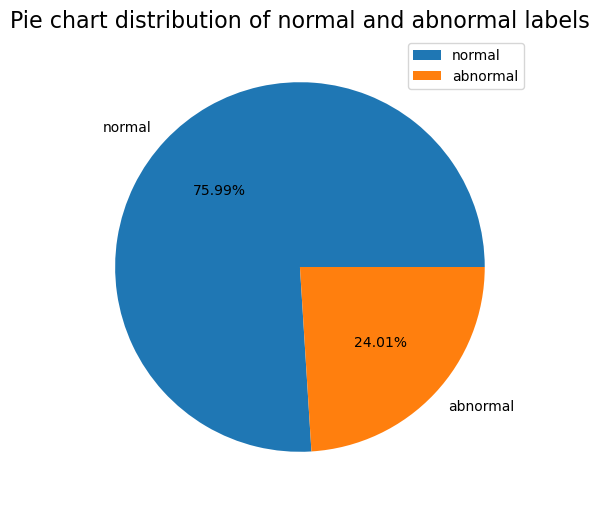

In [258]:
plt.figure(figsize=(6,6))
plt.pie(df.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

Multi-Class Classification

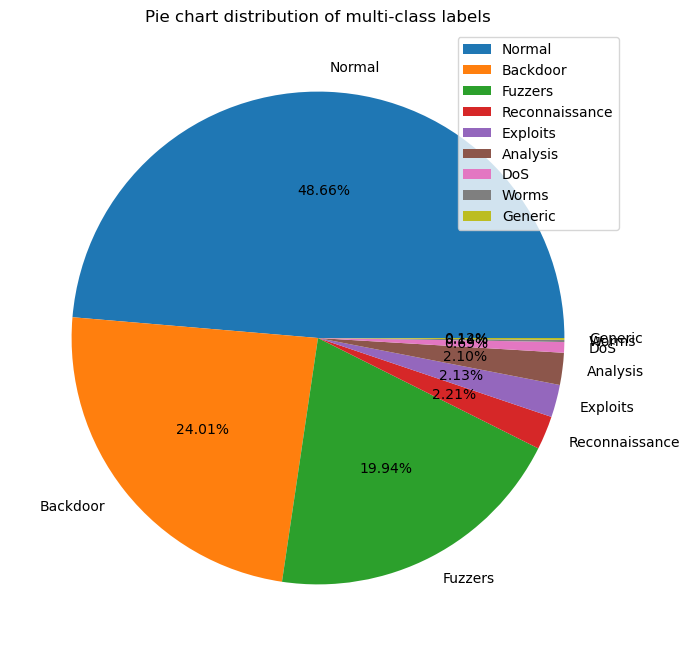

In [259]:
plt.figure(figsize=(8,8))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

# One Hot Encoding

In [260]:
num_col = df.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [261]:
# creating a dataframe with only categorical attributes
data_cat = df[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [262]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [263]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [264]:
df.shape

(81173, 45)

In [265]:
data = pd.concat([df, data_cat],axis=1)

In [266]:
data.shape

(81173, 64)

In [267]:
data.drop(columns=cat_col,inplace=True)

In [268]:
data.shape

(81173, 61)

## Data Normalization

In [269]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [270]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [271]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [272]:
# calling normalization() function
data = normalization(data.copy(),num_col)

# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Label Encoding

Binary Labeles

In [273]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [274]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [275]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [276]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [277]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## Multi Class Labels

In [278]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [279]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [280]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [281]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [282]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

## Correlation between features of dataset

In [283]:
num_col.append('label')

## Correlation Matrix for Binary Labels

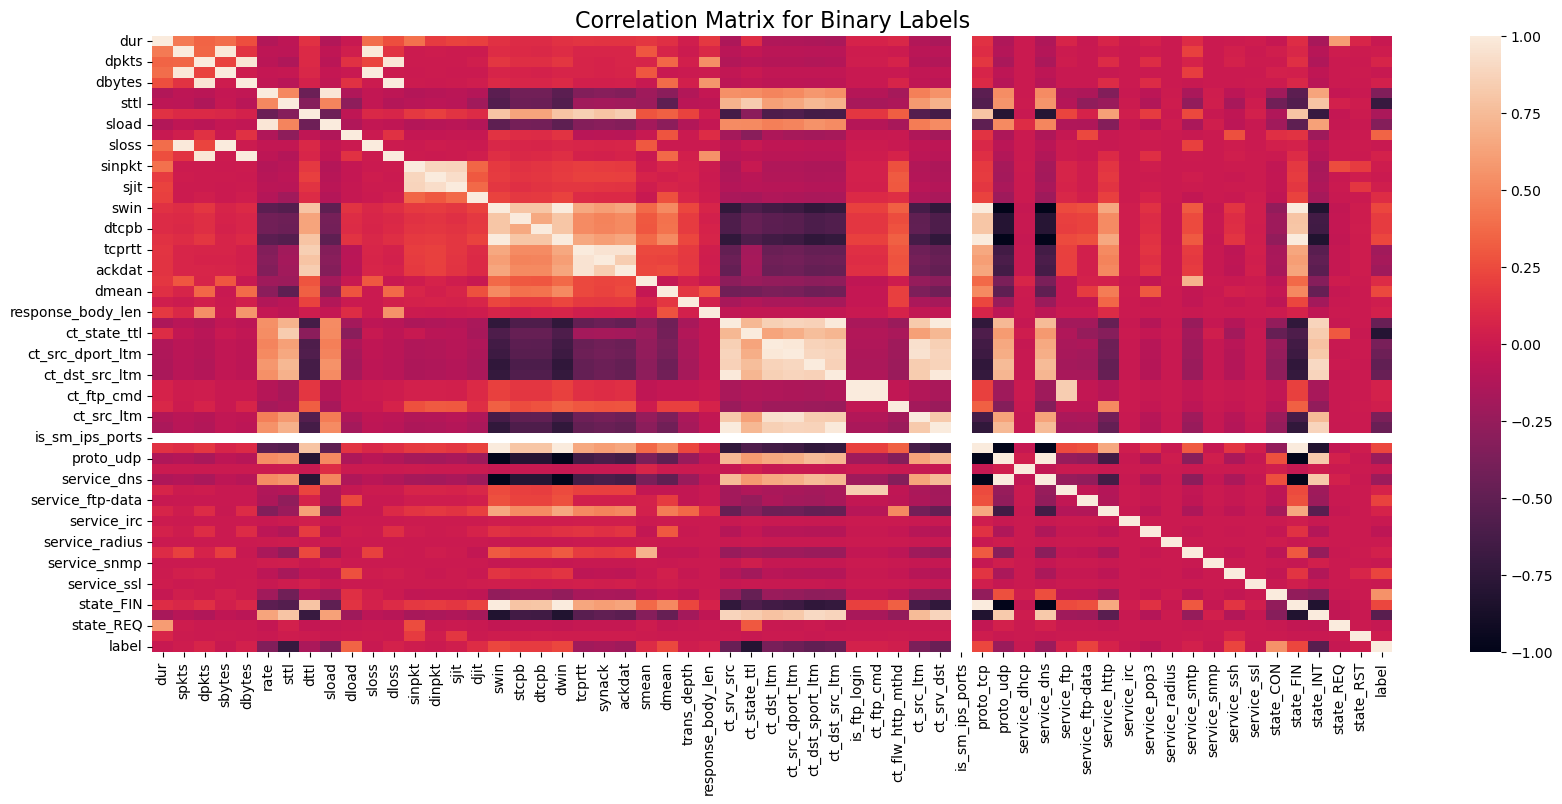

In [284]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

Correlation Matrix for Multi-class Labels

In [285]:
num_col = list(multi_data.select_dtypes(include='number').columns)

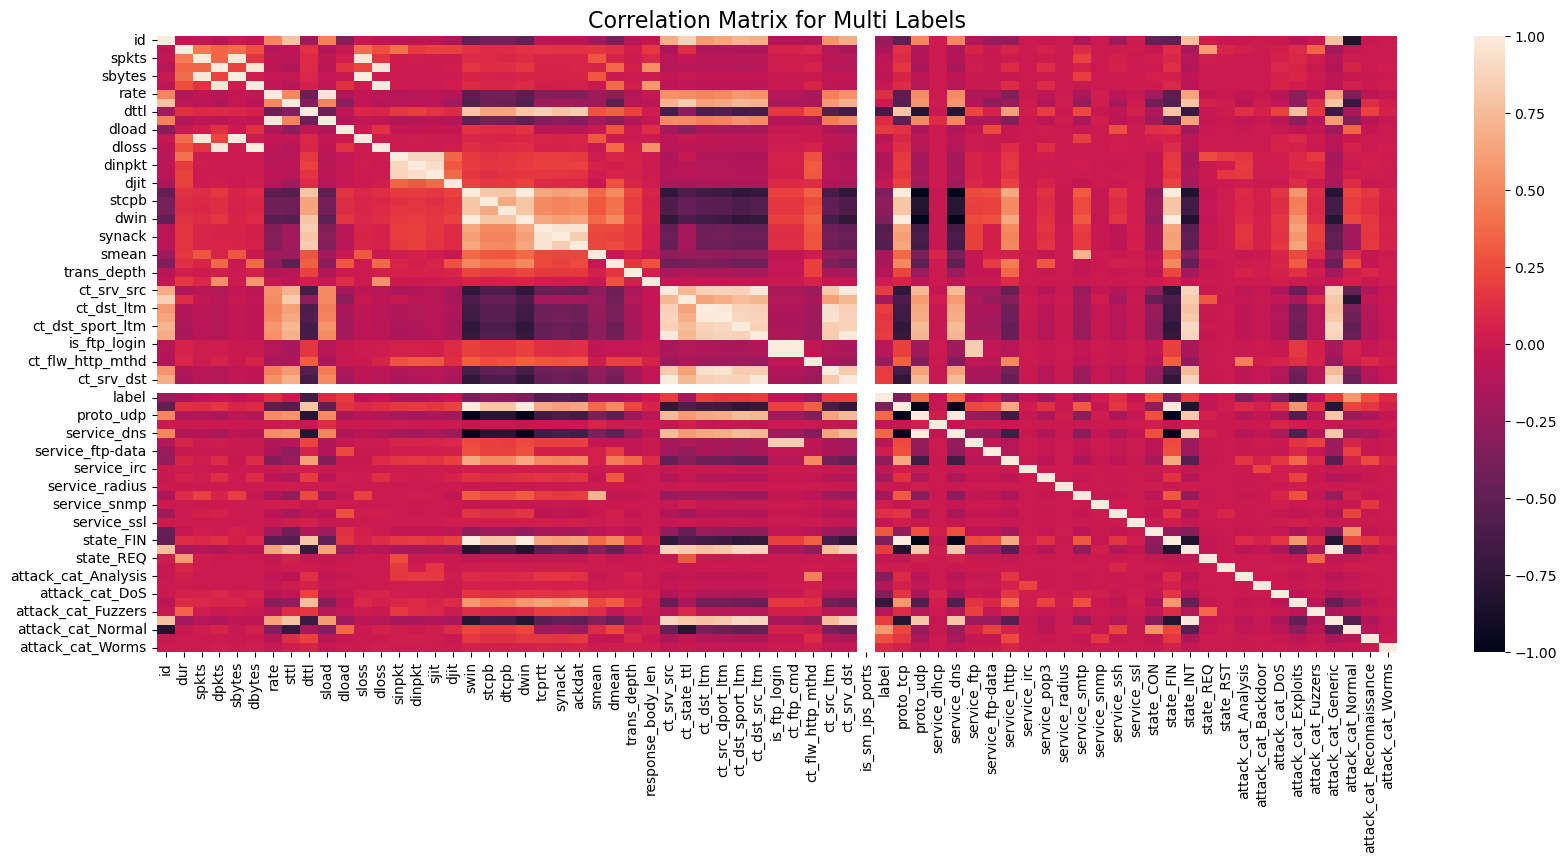

In [286]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

## **Feature Selection**

## Binary Labels

In [287]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [288]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [289]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


Saving to disk

In [290]:
bin_data.to_csv('C:/Users/RUCHIR/Desktop/bin_data.csv')

Multi Class Labels

In [291]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

state_CON              0.302853
attack_cat_Analysis    0.326209
attack_cat_DoS         0.339669
state_FIN              0.361750
proto_udp              0.364393
swin                   0.364393
dwin                   0.364393
proto_tcp              0.364393
service_dns            0.365346
synack                 0.524027
ackdat                 0.570098
tcprtt                 0.570205
attack_cat_Normal      0.570858
dttl                   0.646589
attack_cat_Exploits    0.719733
label                  1.000000
Name: label, dtype: float64

In [292]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'],
      dtype='object')

In [293]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

## Saving Prepare To Disk

In [294]:
multi_data.to_csv('C:/Users/RUCHIR/Desktop/multi_data.csv')

# Binary Classification

## Data Splitting

In [295]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [296]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# Logistic Regression

In [297]:
logr_bin = LogisticRegression(random_state=123, max_iter=5000)
logr_bin

LogisticRegression(max_iter=5000, random_state=123)

In [298]:
logr_bin.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=123)

In [299]:
y_pred = logr_bin.predict(X_test)

In [300]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.02198952879581152
Mean Squared Error -  0.02198952879581152
Root Mean Squared Error -  0.1482886671186019
R2 Score -  88.17947258428785
Accuracy -  97.80104712041884


In [301]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       0.99      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



## Real and Predicted Data

In [302]:
logr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_bin_df.to_csv('logr_real_pred_bin.csv')
logr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


## Plot between Real and Predicted Data

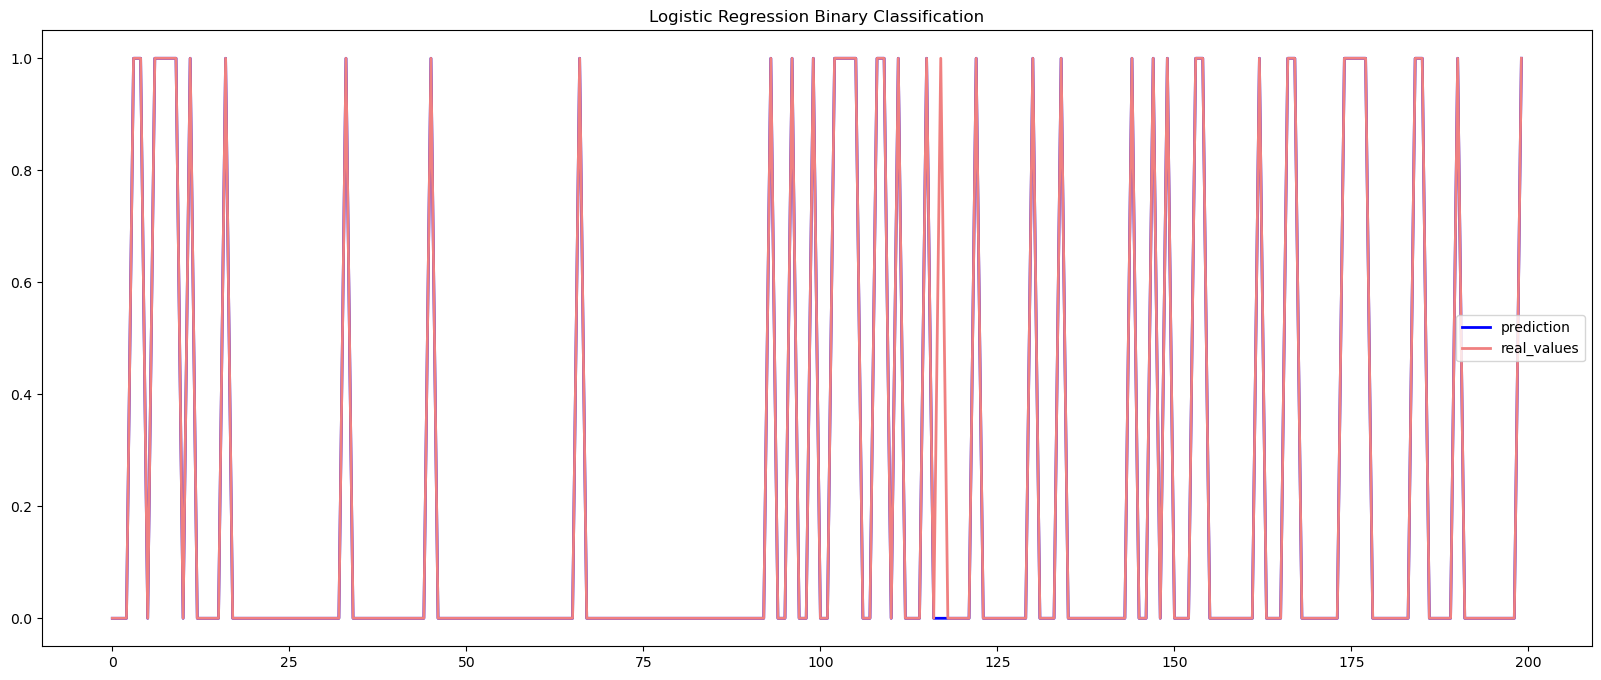

In [303]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.show()

## Saving Trained Model to Disk

In [304]:
pkl_filename = "C:/Users/RUCHIR/Desktop/logistic_regressor_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Linear Support Vector Machine

In [305]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [306]:
y_pred = lsvm_bin.predict(X_test)

In [307]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.021496766245765322
Mean Squared Error -  0.021496766245765322
Root Mean Squared Error -  0.1466177555610688
R2 Score -  88.45167193436498
Accuracy -  97.85032337542347


In [308]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.91      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



## Real and Predicted Data

In [309]:
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_bin_df.to_csv('lsvm_real_pred_bin.csv')
lsvm_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


## Plot between Real and Predicted Data

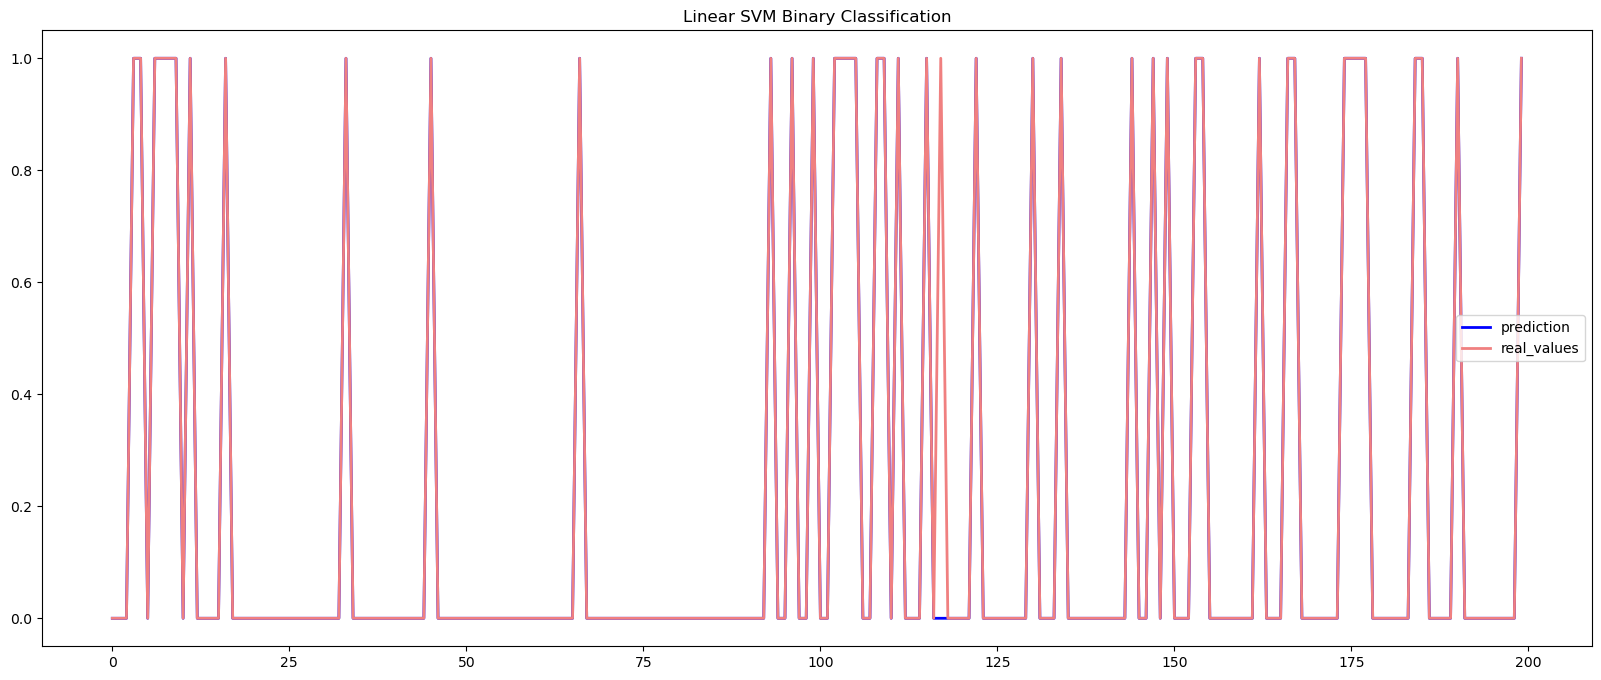

In [310]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.show()

## Saving Trained Model to Disk

In [311]:
pkl_filename = "C:/Users/RUCHIR/Desktop/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## K Nearest Neighbor Classifier

In [312]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [313]:
y_pred = knn_bin.predict(X_test)

In [314]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.016938712657838004
Mean Squared Error -  0.016938712657838004
Root Mean Squared Error -  0.13014880966738807
R2 Score -  90.74435871039374
Accuracy -  98.3061287342162


In [315]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.97      0.96      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.98     16235
weighted avg       0.98      0.98      0.98     16235



## Real and Predicted Data

In [316]:
knn_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_bin_df.to_csv('knn_real_pred_bin.csv')
knn_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


## Plot between Real and Predicted Data

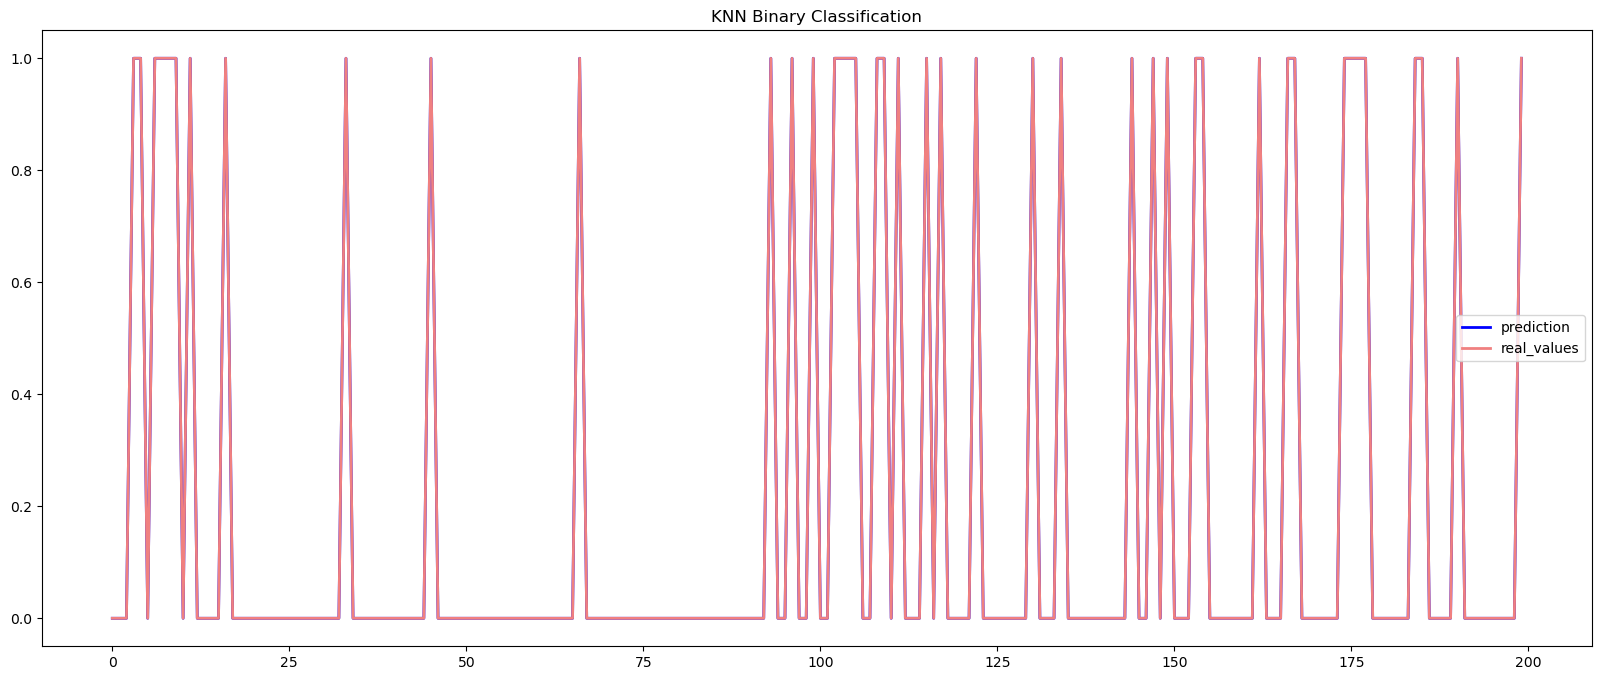

In [317]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Binary Classification")
plt.show()

## Saving Trained Model to Disk

In [318]:
pkl_filename = "knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Random Forest Classifier

In [319]:
 rf_bin = RandomForestClassifier(random_state=123)
 rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [320]:
y_pred = rf_bin.predict(X_test)

In [321]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.013550970126270403
Mean Squared Error -  0.013550970126270403
Root Mean Squared Error -  0.1164086342427846
R2 Score -  92.59509512345335
Accuracy -  98.64490298737296


In [322]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



## Real and Predicted Data

In [323]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


## Plot between Real and Predicted Data

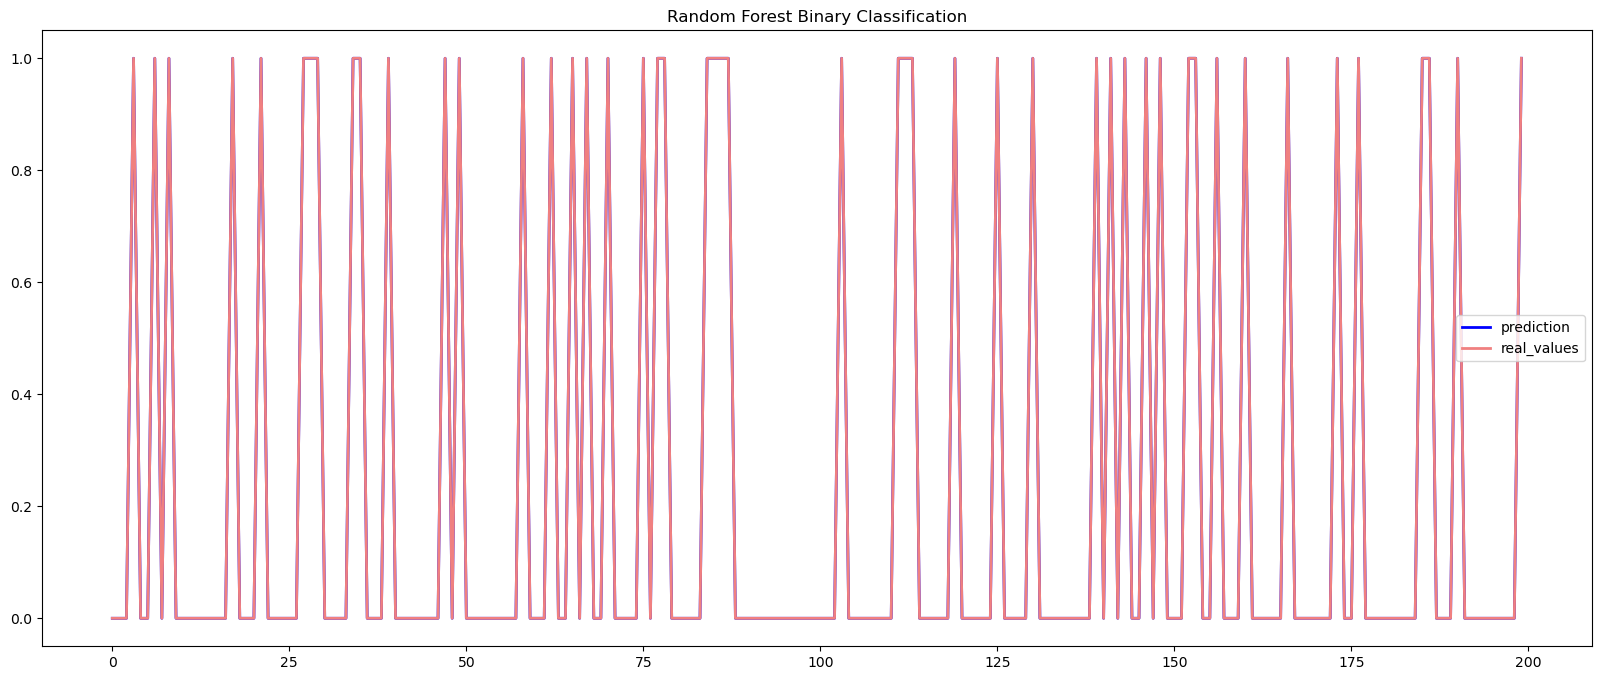

In [324]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.show()

## Saving Trained Model to Disk

In [325]:
pkl_filename = "random_forest_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Multi Layer Perceptron

In [326]:
mlp_bin = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

In [327]:
mlp_bin.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [328]:
y_pred = mlp_bin.predict(X_test)

In [329]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.01632275947028026
Mean Squared Error -  0.01632275947028026
Root Mean Squared Error -  0.12776055522061674
R2 Score -  91.10646238100463
Accuracy -  98.36772405297197


In [330]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.99     12326
      normal       0.98      0.95      0.97      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.98     16235
weighted avg       0.98      0.98      0.98     16235



## Real and Predicted Data

In [331]:
mlp_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_bin_df.to_csv('mlp_real_pred_bin.csv')
mlp_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


## Plot between Real and Predicted Data

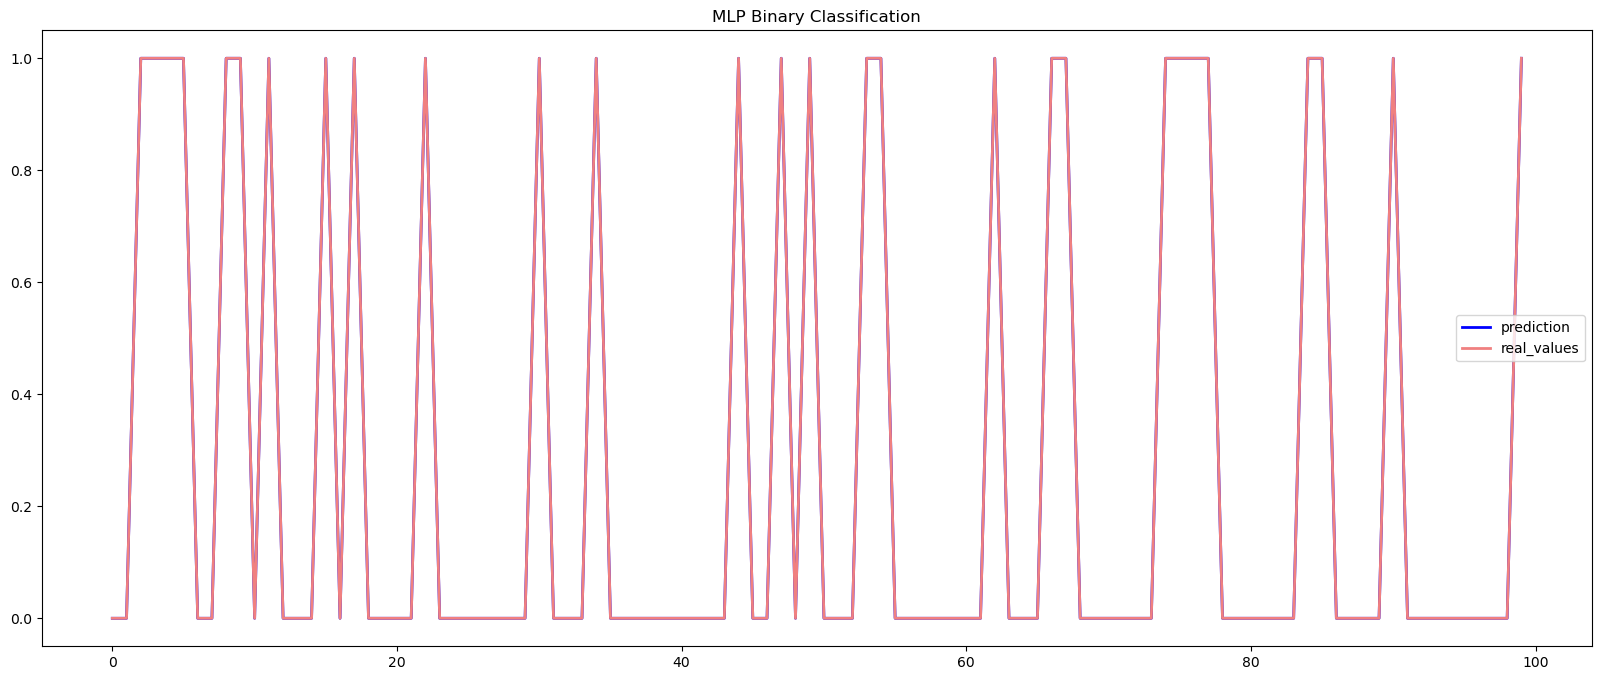

In [332]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Binary Classification")
plt.show()

## Saving Trained Model to Disk

In [333]:
pkl_filename = "mlp_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_bin, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# Multi Class Classification

## Data Splitting

In [334]:
from sklearn.ensemble import ExtraTreesClassifier

In [335]:
etc = ExtraTreesClassifier(n_estimators=200)

In [336]:
model = etc.fit(X_train,y_train)

In [337]:
model.feature_importances_*100

array([ 3.69253752, 33.45139349,  2.18240261,  3.33921182,  2.65776143,
       24.50606703,  1.76301678,  1.04062082,  1.45757122,  2.58997554,
        1.79013233,  3.53947071, 11.85042694,  6.13941175])

In [338]:
model.feature_names_in_

array(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'state_CON',
       'state_INT'], dtype=object)

In [339]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [340]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [394]:
X

,dttl,swin,dwin,tcprtt,synack,ackdat,proto_tcp,proto_udp,service_dns,state_CON,state_FIN,attack_cat_Analysis,attack_cat_DoS,attack_cat_Exploits,attack_cat_Normal
3,0.992126,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0,0,0,1
11,0.992126,1.0,1.0,0.087972,0.103000,0.054975,1.0,0.0,0.0,0.0,1.0,0,0,0,1
15,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0,0,0,1
17,0.992126,1.0,1.0,0.080709,0.115373,0.042914,1.0,0.0,0.0,0.0,1.0,0,0,0,1
21,0.992126,1.0,1.0,0.103597,0.107399,0.069747,1.0,0.0,0.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175338,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175339,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0,0,0,0


In [395]:
from sklearn.ensemble import ExtraTreesClassifier

In [396]:
etc = ExtraTreesClassifier(n_estimators=200)

In [397]:
model = etc.fit(X_train,y_train)

In [398]:
model.feature_names_in_

array(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'proto_tcp',
       'proto_udp', 'service_dns', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal'], dtype=object)

## Logistic Regression

In [341]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=123,
                   solver='newton-cg')

In [342]:
y_pred = logr_multi.predict(X_test)

In [343]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.060077201051248356
Mean Squared Error -  0.18056011826544022
Root Mean Squared Error -  0.42492366169165047
R2 Score -  87.87674567880146
Accuracy -  97.58952036793693


In [344]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.56      0.42      0.48       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.76      0.63       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.69      0.68     24352
  weighted avg       0.97      0.98      0.97     24352



C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Real And Predicted Data

In [345]:
logr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_multi_df.to_csv('logr_real_pred_multi.csv')
logr_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


## Plot between Real and Predicted Data

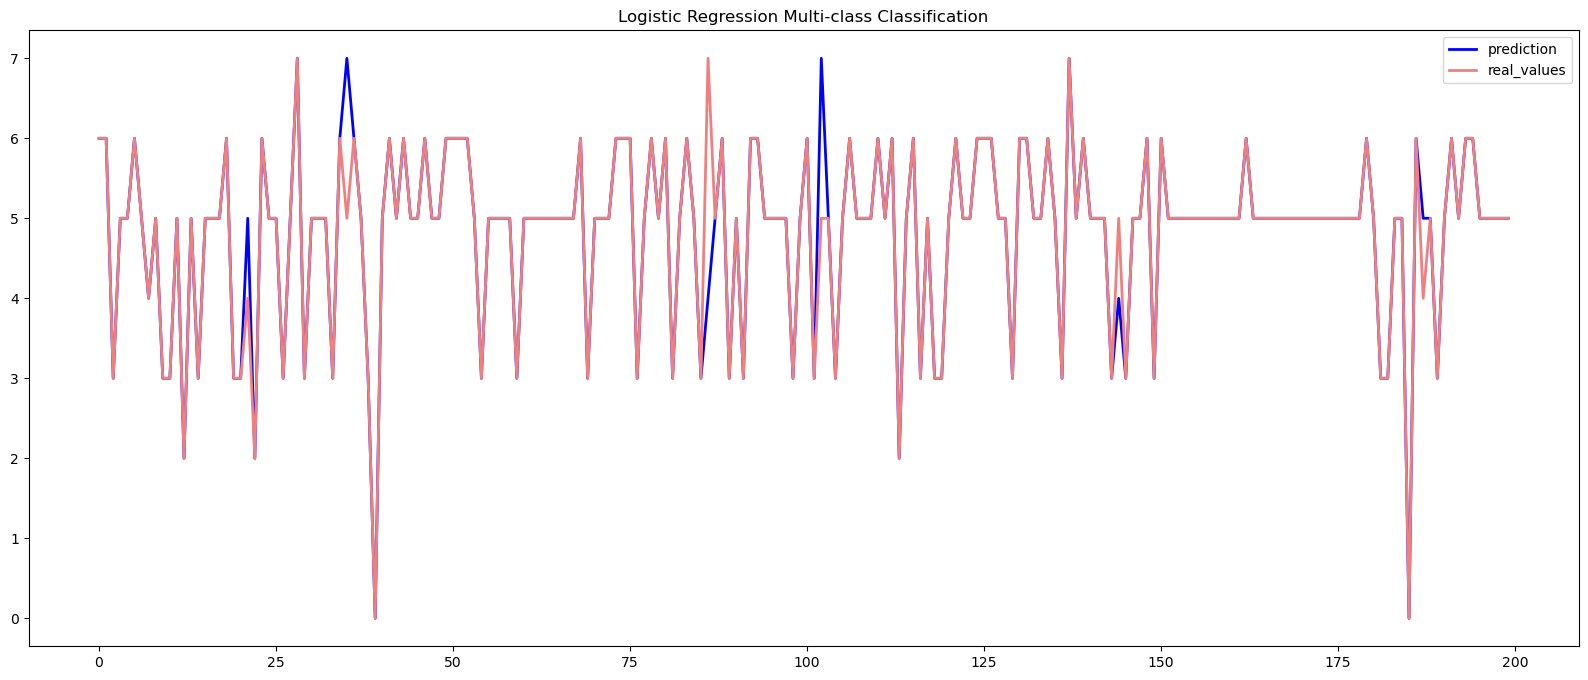

In [346]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Multi-class Classification")
plt.show()

## Saving Trained Model to Disk

In [347]:
pkl_filename = "logistic_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Linear Support Vector Machine

In [348]:
lsvm_multi = SVC(kernel='linear',gamma='auto')
lsvm_multi.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [349]:
y_pred = lsvm_multi.predict(X_test)

In [350]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.059912943495400786
Mean Squared Error -  0.17941031537450722
Root Mean Squared Error -  0.42356854861345317
R2 Score -  87.93449282205455
Accuracy -  97.59362680683311


In [351]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.54      0.47      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.56      0.71      0.62       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.69      0.68     24352
  weighted avg       0.97      0.98      0.98     24352



C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Real and predicted data

In [352]:
lsvm_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_multi_df.to_csv('lsvm_real_pred_multi.csv')
lsvm_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


## Plot between Real and Predicted Data

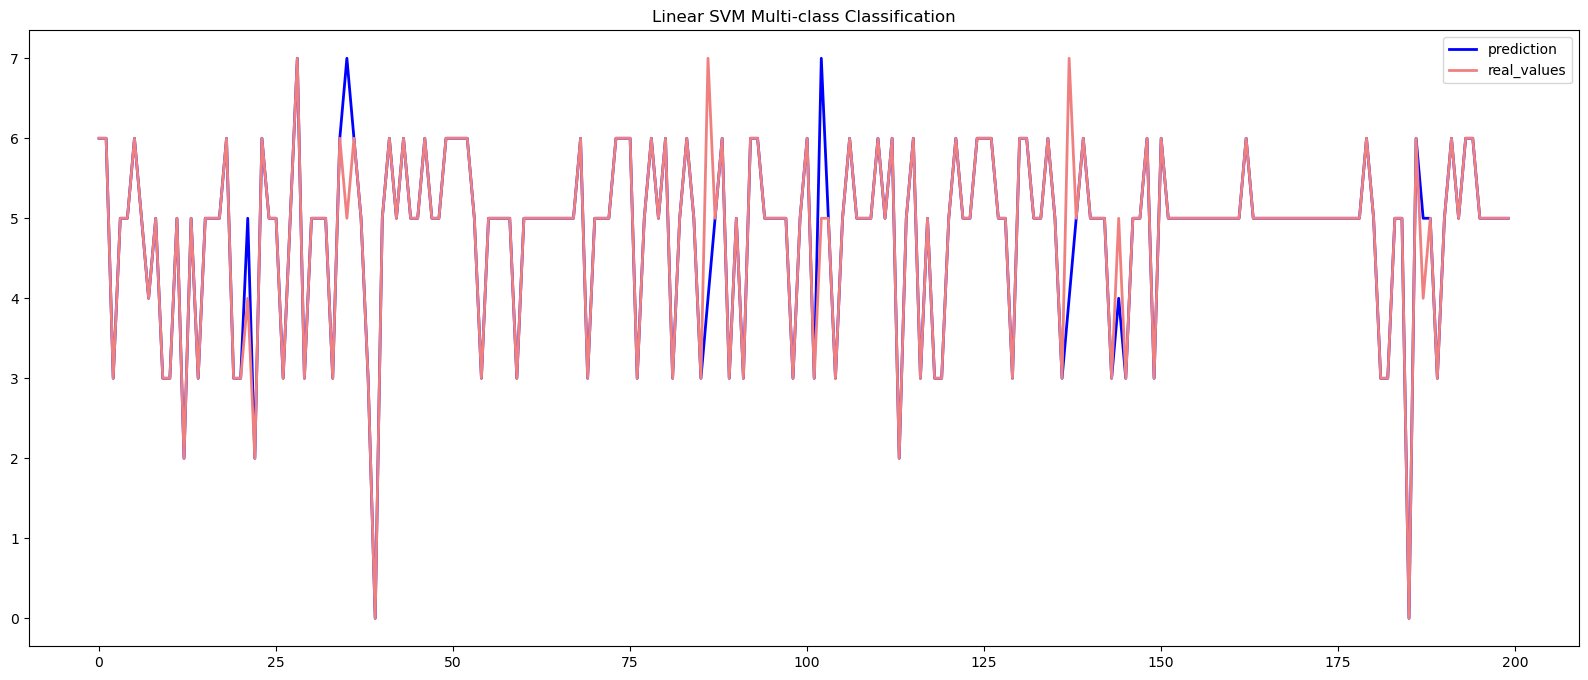

In [353]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Multi-class Classification")
plt.show()

### **Saving Trained Model to Disk**

In [354]:
pkl_filename = "lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## K Nearest Neighbor Classifier

In [355]:
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train,y_train)

KNeighborsClassifier()

In [356]:
y_pred = knn_multi.predict(X_test)

In [357]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06492279894875164
Mean Squared Error -  0.19370072273324573
Root Mean Squared Error -  0.44011444276829376
R2 Score -  86.95611180660822
Accuracy -  97.37598554533508


In [358]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.48      0.52      0.50       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.56      0.54      0.55       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.97     24352
     macro avg       0.67      0.67      0.67     24352
  weighted avg       0.97      0.97      0.97     24352



## Real and Predicted Data

In [359]:
knn_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_multi_df.to_csv('knn_real_pred_multi.csv')
knn_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


## Plot between Real and Predicted Data

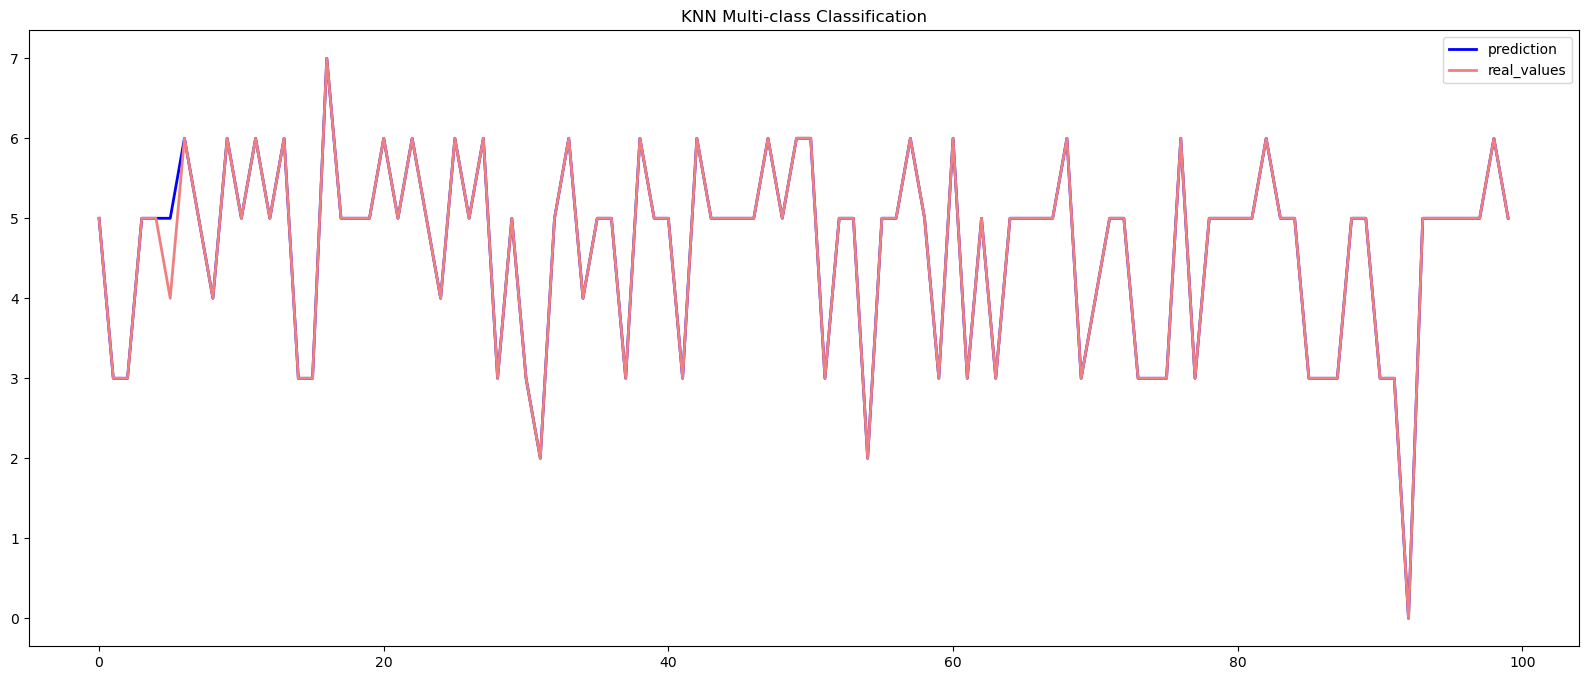

In [360]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Multi-class Classification")
plt.show()

## Saving Trained Model to Disk

In [361]:
pkl_filename = "knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Random Forest Classifier

In [362]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [363]:
y_pred = rf_multi.predict(X_test)

In [364]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06611366622864652
Mean Squared Error -  0.1985052562417871
Root Mean Squared Error -  0.4455392869790352
R2 Score -  86.6379909424011
Accuracy -  97.31849540078844


In [365]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.08      0.03      0.05        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.49      0.43      0.46       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.54      0.60      0.57       502
         Worms       0.12      0.07      0.09        29

      accuracy                           0.97     24352
     macro avg       0.69      0.68      0.68     24352
  weighted avg       0.97      0.97      0.97     24352



## Real and Predicted Data

In [366]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


## Plot between Real and Predicted Data

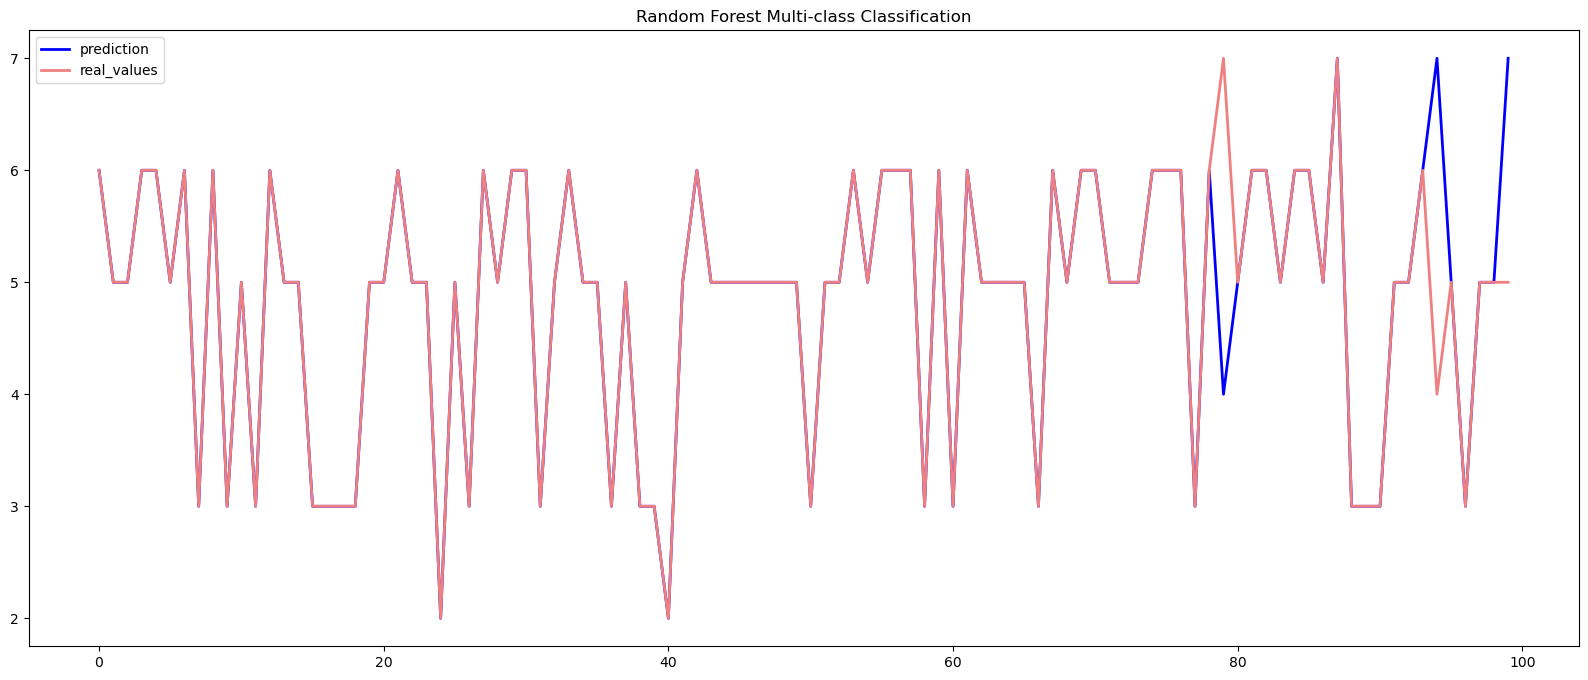

In [367]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.show()

## Saving Trained Model to Disk

In [368]:
pkl_filename = "random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## Multi Layer Perceptron

In [369]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
mlp_multi.fit(X_train,y_train)

MLPClassifier(max_iter=8000, random_state=123)

In [370]:
y_pred = mlp_multi.predict(X_test)

In [371]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06065210249671485
Mean Squared Error -  0.17858902759526937
Root Mean Squared Error -  0.4225979502970517
R2 Score -  87.97913543550516
Accuracy -  97.54434954007884


In [372]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       1.00      1.00      1.00       521
      Exploits       1.00      1.00      1.00      4900
       Fuzzers       0.50      0.63      0.55       508
       Generic       0.99      0.99      0.99     11839
        Normal       1.00      1.00      1.00      5855
Reconnaissance       0.60      0.52      0.56       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.98     24352
     macro avg       0.68      0.68      0.68     24352
  weighted avg       0.97      0.98      0.97     24352



C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUCHIR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Real and Predicted Data

In [373]:
mlp_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlp_multi_df.to_csv('mlp_real_pred_multi.csv')
mlp_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


## Plot between Real and Predicted Data

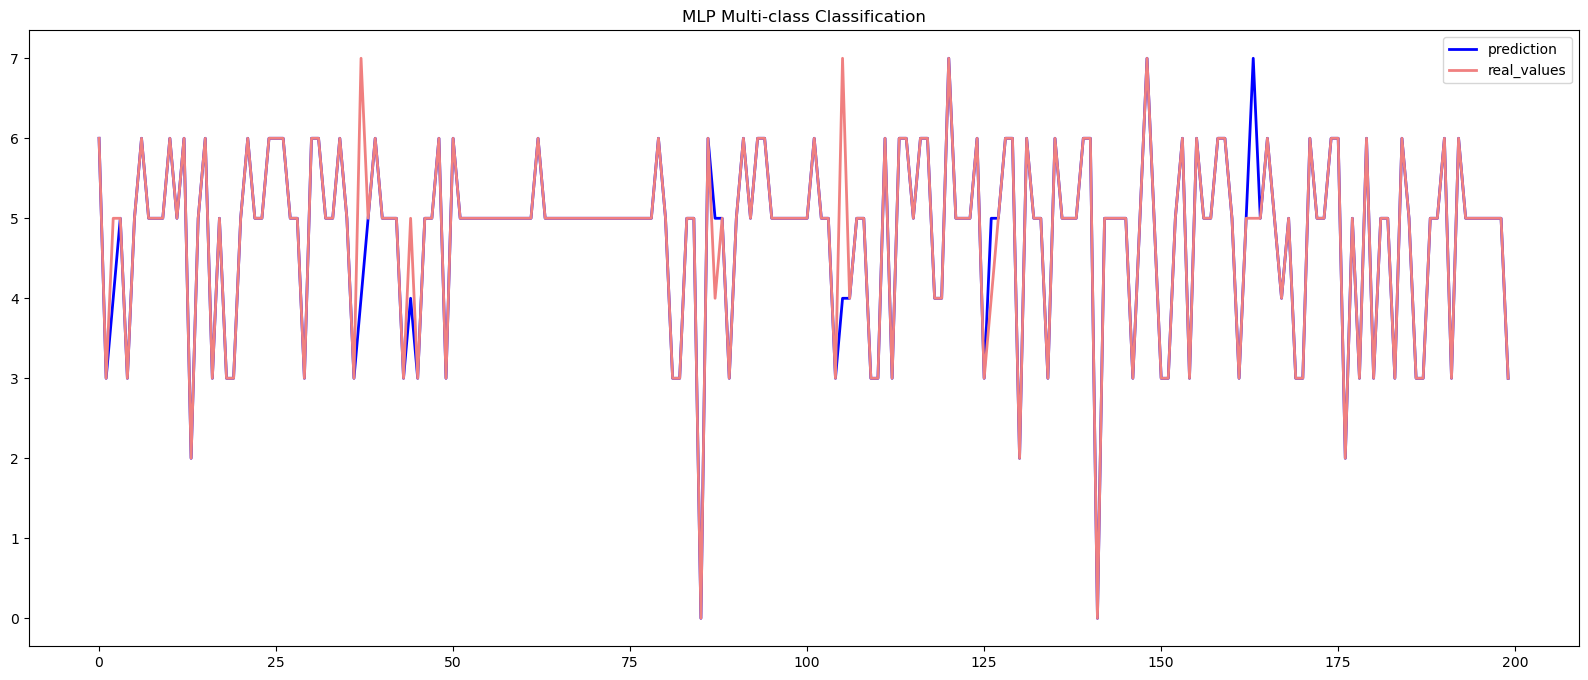

In [374]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:300], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Multi-class Classification")
plt.show()

## Saving Trained Model to Disk

In [375]:
pkl_filename = "mlp_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [376]:
from sklearn.ensemble import AdaBoostRegressor

In [377]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb  #XGB

In [378]:
model = {
'linear_regression' : {'model': LinearRegression(),'params': {'positive': [True, False]}},
'random_forest': {'model': RandomForestRegressor(),'params': {'n_estimators': [50,100,200,300],'max_samples': [30000,35000]}},
"ada_boosting" : {"model": AdaBoostRegressor(),'params': {'n_estimators': [50,100,200,300]}},
}

In [379]:
model

{'linear_regression': {'model': LinearRegression(),
  'params': {'positive': [True, False]}},
 'random_forest': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [50, 100, 200, 300],
   'max_samples': [30000, 35000]}},
 'ada_boosting': {'model': AdaBoostRegressor(),
  'params': {'n_estimators': [50, 100, 200, 300]}}}

In [380]:
for i,j in model.items():
    print(j["params"])

{'positive': [True, False]}
{'n_estimators': [50, 100, 200, 300], 'max_samples': [30000, 35000]}
{'n_estimators': [50, 100, 200, 300]}


In [381]:
def find_best_model_using_gridsearchcv(X,Y):

    scores = []
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for model_name, config in model.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        # Save the results of each model to a separate pickle file
        with open(f'{model_name}_result.pkl', 'wb') as file:
            pickle.dump(gs.cv_results_, file)

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [382]:
export_model_result = find_best_model_using_gridsearchcv(X,Y)

In [383]:
export_model_result

,model,best_score,best_params
0,linear_regression,0.911822,{'positive': False}
1,random_forest,0.915729,"{'max_samples': 30000, 'n_estimators': 100}"
2,ada_boosting,0.905360,{'n_estimators': 300}


# ANN IMPLEMENTATION

In [384]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [385]:
regressor=Sequential()
regressor.add(Dense(units=14,activation="relu"))
regressor.add(Dense(units=10,activation="ELU"))
regressor.add(Dense(units=1,activation="linear"))
regressor.compile(optimizer='adam',loss="mean_absolute_error")

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
X_train.shape[0]*.67/10

3807.007

In [388]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=0)

In [389]:
model=regressor.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=20)

Epoch 1/20
4351/4351 [==============================] - 17s 4ms/step - loss: 0.2000 - val_loss: 0.0782
Epoch 2/20
4351/4351 [==============================] - 15s 4ms/step - loss: 0.0870 - val_loss: 0.0842
Epoch 3/20
4351/4351 [==============================] - 15s 3ms/step - loss: 0.0853 - val_loss: 0.0757
Epoch 4/20
4351/4351 [==============================] - 15s 4ms/step - loss: 0.0842 - val_loss: 0.0802
Epoch 5/20
4351/4351 [==============================] - 15s 3ms/step - loss: 0.0852 - val_loss: 0.0800
Epoch 6/20
4351/4351 [==============================] - 16s 4ms/step - loss: 0.0838 - val_loss: 0.0811
Epoch 7/20
4351/4351 [==============================] - 15s 4ms/step - loss: 0.0837 - val_loss: 0.0836
Epoch 8/20
4351/4351 [==============================] - 15s 4ms/step - loss: 0.0834 - val_loss: 0.0785
Epoch 9/20
4351/4351 [==============================] - 15s 4ms/step - loss: 0.0827 - val_loss: 0.0780
Epoch 10/20
4351/4351 [==============================] - 15s 3ms/step - l

In [390]:
model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                224       
                                                                 
 dense_4 (Dense)             (None, 10)                150       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [391]:
y_pred=regressor.predict(X_test)

508/508 [==============================] - 1s 2ms/step


In [392]:
from sklearn.metrics import r2_score,mean_absolute_error

In [393]:
mean_absolute_error(y_test,y_pred)

0.07634053114729365